# Lyft Three-Side Market Example

To provide a more concrete example of BlockScience's Three-Sided Market Paradigm, as developed by Dr. Zargham, we obtained limited information about Lyft's operations from their SEC Form S-1 IPO Registration Statement. We will use the data provided to provide a tangible example of how the Three-Sided Market operates, while showcasing our cadCAD simulation tool.

The ‘Three-Sided Market’ model is for platform business where the product being produced enables transactions between a service provider and service consumer. The reference example for this case is a ride sharing app such as Uber. In this case drivers would be providers and riders would be consumers. The corporation Uber is the producer, and in our three-sided-market that role will be spread to a decentralized community collectively providing all of the functions required for users (providers and consumers) to have an equivalent user experience.

The design challenge posed is that of crafting economic mechanisms and policies that ensure that community is able to thrive; like a corporation it must remain financially solvent, but unlike a corporation there need not be expectations of forced growth or outsized profits. Without a need to extract rent to meet corporate goals, the dynamic resource allocation problem required to maintain a healthy economy is while challenging, fundamentally more tractable than a quest for ever growing profits.

This work is part of the ongoing economic systems research at BlockScience. We would be thrilled to have you build on our work, but please cite us if you do.

Models presented are note predictions or final designs, merely 'what-if' explorations of complex socio-technical systems. Contact media@block.science with interest in our methods and tools.

## Building a model of the Three-Sided Market

To construct our model, we will use our internally developed simulation tool called cadCAD. Below is a description:

cadCAD is a differential games based simulation software package for research, validation, and Computer Aided Design of economic systems. An economic system is treated as a state-based model and defined through a set of endogenous and exogenous state variables which are updated through mechanisms and environmental processes, respectively. Behavioral models, which may be deterministic or stochastic, provide the evolution of the system within the action space of the mechanisms. Mathematical formulations of these economic games treat agent utility as derived from the state rather than direct from an action, creating a rich, dynamic modeling framework. Simulations may be run with a range of initial conditions and parameters for states, behaviors, mechanisms, and environmental processes to understand and visualize network behavior under various conditions. Support for A/B testing policies, monte carlo analysis, and other common numerical methods is provided.

What that essentially means is cadCAD allows us to use code to help solidify our conceptualized ideas and run them to see if the outcome meets our expectations. We can then iteratively refine our work until we have constructed a model that closely reflects reality at the start of the model, and see how it evolves. We can then use these results to inform business decisions. 

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib 
from tabulate import tabulate
from cadCAD.engine import ExecutionMode, ExecutionContext, Executor
import LyftConfig
from cadCAD import configs
import matplotlib.pyplot as plt

%matplotlib inline

exec_mode = ExecutionMode()

## Importing Lyft SEC Data

In [53]:
financial = pd.read_excel('data/SECData.xlsx',sheet_name = 'Financial',header=1)
rider = pd.read_excel('data/SECData.xlsx',sheet_name = 'RiderData',header=1)

Below we view the data. All numbers are in millions EXCEPT for Revenue per Active Rider which is as seen.

In [33]:
financial

,Date,Riders,Drivers,Bookings,Revenue,Active Riders,Net Income,Contribution,Revenue as a Percentage of Bookings,Contribution Margin
0,2018,30.7,1.9,8054.4,2200.0,18.6,-911.3,920.8,26.8,42.7
1,2017,NaN,NaN,4586.7,1100.0,NaN,-688.3,400.9,23.1,37.8
2,2016,NaN,NaN,1904.7,343.3,NaN,-682.0,82.0,18.0,23.9


In [34]:
financial.fillna(0,inplace=True)
financialSubset = financial[['Date','Bookings','Revenue','Net Income','Contribution']]

In [54]:
rider

,Date,Active Riders,Revenue per Active Rider,Rides
0,2016-03-31,3.5,15.88,29.0
1,2016-06-30,4.5,14.11,36.5
2,2016-09-30,5.7,18.03,44.3
3,2016-12-31,6.6,18.53,52.6
4,2017-03-31,8.1,21.42,70.4
5,2017-06-30,9.4,25.29,85.8
6,2017-09-30,11.4,26.59,103.1
7,2017-12-31,12.6,27.34,116.3
8,2018-03-31,14.0,28.27,132.5
9,2018-06-30,15.5,32.67,146.3


## Build individual components 

Before we will create a holistic model that takes into account all of the individual components and how they interact in our 'dynamic system', we will construct below individual components and explain their structure. 

### Transactions
First, we will construct our Transactions function, which will be the unit that drives the rest of the model. To start, we plot the Rides data (in millions) from the SEC obtained data on Lyft

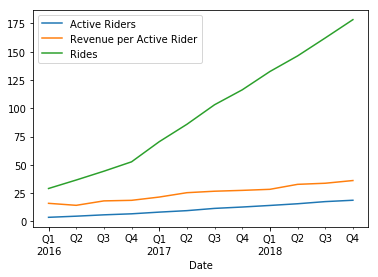

In [55]:
#rider.plot(x='Date',y='Rides')
rider.plot(x='Date',y=['Active Riders', 'Revenue per Active Rider', 'Rides'])

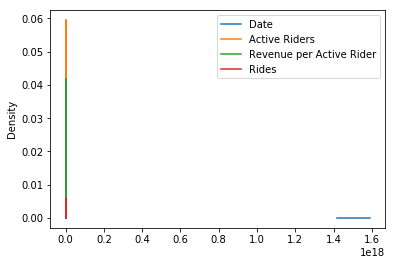

In [24]:
rider.plot.kde()

In [58]:
x=rider.Date.values
y=rider.Rides.values

p = np.polyfit(x, y, deg = 2)
f = np.poly1d(p)

# calculate new x's and y's
x_new = np.linspace(x[0], x[-1], 50)
y_new = f(x_new)

plt.plot(x,y,label='Original Data')
plt.plot(x_new, y_new, label='Fitted line')
plt.legend()

TypeError: ufunc add cannot use operands with types dtype('<M8[ns]') and dtype('float64')

In [60]:
print(f)

          2
5.58e-33 x - 1.498e-14 x + 1e+04


[(0, 10499.95),
 Text(0, 0.5, 'volume'),
 Text(0.5, 0, 'time step'),
 Text(0.5, 1.0, 'Stochastic Growth Process')]

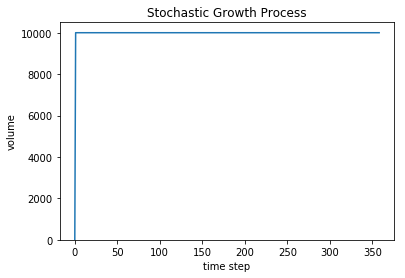

In [29]:
a = 5.58e-33
b = 1.498e-14 
c = 1e+04

length = range(360)
v = np.zeros(length[-1])
v[0] = 1
for i in length[1:-1]:
    v[i] = a*i - b*i + c

fig, ax = plt.subplots( nrows=1, ncols=1 )
ax.plot(v,label='growth rate')
ax.set(xlabel='time step', ylabel='volume',
       title='Stochastic Growth Process',ylim = 0)


## Financials

In [ ]:
#financial.plot(x='Date',y='Revenue')
financialSubset.plot(x='Date',y=['Bookings','Revenue','Net Income','Contribution'])

In [ ]:
financialSubset.plot.kde()

In [ ]:
eta = .04
tampw = 10000 

length = range(360)
v = np.zeros(length[-1])
v[0] = 1
for i in length[1:-1]:
    v[i] = v[i-1]*(1+2*eta*np.random.rand()*(1-v[i-1]/tampw))

fig, ax = plt.subplots( nrows=1, ncols=1 )
ax.plot(v,label='growth rate')
ax.set(xlabel='time step', ylabel='volume',
       title='Stochastic Growth Process',ylim = 0)


### Product Cost
Create a random process to represent the growth of the cost of production, due to inflation, etc over time.

In [ ]:
alpha = .5 
beta = .2
length = range(360)
p = np.zeros(length[-1])
p[0] = .5
for i in length[1:-1]:
    p[i] = alpha * p[i-1]+beta*np.random.rand()
    
fig, ax = plt.subplots(nrows=1, ncols=1 )
ax.plot(p,label='cost')
ax.set(xlabel='time step', ylabel='cost',
       title='Product Cost Stochastic Process',ylim = 0)

#fig = USDToSDR.plot(grid=True).get_figure()
fig.savefig('images/productCost.png')
# plt.plot(p,label='cost')
# plt.title('Product Cost Stochastic Process')
# plt.xlabel('time step')
# plt.ylabel('volume')
# plt.ylim(0)
# plt.legend()

In [ ]:
plot = pd.DataFrame({'Stochastic Growth Process':v,'Product Cost Stochastic Process':p})

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15, 5),sharey=False)
fig.tight_layout(pad=8)
#fig.suptitle("Components", fontsize=16)

plot.plot(y='Stochastic Growth Process',title='Stochastic Growth Process',logy=False,ax=axes[0],grid=True)
plot.plot(y='Product Cost Stochastic Process',title='Product Cost Stochastic Process',logy=False,ax=axes[1],grid=True)

fig.savefig('images/components.eps', format='eps', dpi=300)

### Run the cadCAD model of our ecosystem 
See the attached file called threeSidedConfig.py for the full modeling and policy details.

In [19]:
# Run Cad^2

first_config = configs 
single_proc_ctx = ExecutionContext(context=exec_mode.single_proc)
run = Executor(exec_context=single_proc_ctx, configs=first_config)

raw_result, tensor_field = run.main()
df = pd.DataFrame(raw_result)

single_proc: [<cadCAD.configuration.Configuration object at 0x7ffa80817898>]


/home/aclarkdata/anaconda3/lib/python3.6/site-packages/cadCAD/utils/__init__.py:89: FutureWarning: The use of a dictionary to describe Partial State Update Blocks will be deprecated. Use a list instead.
  FutureWarning)


## Results
We look the results at the beginning and the ending of our model to see we started on 2019-03-01 and allowed our model to evolve until 2020-02-24. 

In [ ]:
df = df.round(2)

In [ ]:
#df.head(5).to_csv('testHead.csv')
#df.tail(5).to_csv('testTail.csv')

In [15]:
df.tail(5)

NameError: name 'df' is not defined

We examine the Fiat Reserve in more depth and fit a line a to the plot to show the trajectory. As we can see from the plot below, the fiat reserve is increasing throughout the time period studied. 

In [ ]:
coefficients, residuals, _, _, _ = np.polyfit(range(len(df['fiat_reserve'])),df['fiat_reserve'],1,full=True)
plt.plot(df['fiat_reserve'],label='fiat_reserve')
plt.plot([coefficients[0]*x + coefficients[1] for x in range(len(df['fiat_reserve']))],label='trend line')
plt.title('Fiat Reserve')
plt.xlabel('time step')
plt.ylabel('volume')
#plt.ylim(0)
plt.legend()

We also examine the transaction volume, and as it is an exogenous (external to the system) process, it follows the same s-shaped curve we built as an individual component above. 

In [ ]:
coefficients, residuals, _, _, _ = np.polyfit(range(len(df['tx_volume'])),df['tx_volume'],1,full=True)
plt.plot(df['tx_volume'],label='tx_volume')
plt.plot([coefficients[0]*x + coefficients[1] for x in range(len(df['tx_volume']))],label='trend line')
plt.title('Transaction Volume')
plt.xlabel('time step')
plt.ylabel('volume')
plt.ylim(0)
plt.legend()

In [ ]:
coefficients, residuals, _, _, _ = np.polyfit(range(len(df['seed_money'])),df['seed_money'],1,full=True)
plt.plot(df['seed_money'],label='seed_money')
plt.plot([coefficients[0]*x + coefficients[1] for x in range(len(df['seed_money']))],label='trend line')
plt.title('Seed Money')
plt.xlabel('time step')
plt.ylabel('$')
plt.ylim(0)
plt.legend()

In [ ]:
coefficients, residuals, _, _, _ = np.polyfit(range(len(df['revenue'])),df['revenue'],1,full=True)
plt.plot(df['revenue'],label='revenue')
plt.plot([coefficients[0]*x + coefficients[1] for x in range(len(df['revenue']))],label='trend line')
plt.title('Revenue')
plt.xlabel('time step')
plt.ylabel('$')
plt.ylim(0)
plt.legend()

Finally, we examine the Cost of Production. It resembles the component we built in the first section, but is a little more stable, with a downward trend. Initialy, we had a starting value of 2.0 for the cost of production, with a quick drop and relatively stable with a median value of 0.39.

In [ ]:
df['product_cost'].describe()

In [ ]:
coefficients, residuals, _, _, _ = np.polyfit(range(len(df['product_cost'])),df['product_cost'],1,full=True)
plt.plot(df['product_cost'],label='Product Cost')
plt.plot([coefficients[0]*x + coefficients[1] for x in range(len(df['product_cost']))],label='trend line')
plt.title('Product Cost')
plt.xlabel('time step')
plt.ylabel('volume')
#plt.ylim(0)
plt.legend()

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(15, 15),sharey=False)
fig.tight_layout(pad=8)
#fig.suptitle("cadCAD Simulation Results", fontsize=16)

df.plot(y='fiat_reserve',title='Fiat Reserve',logy=False,ax=axes[0,0],grid=True)
df.plot(y='seed_money',title='Seed Money Inflow',logy=False,ax=axes[0,1],grid=True)
df.plot(y='overhead_cost',title='Overhead Cost ',logy=False,ax=axes[1,0],grid=True)
df.plot(y='product_cost',title='Product Cost',logy=False,ax=axes[1,1],grid=True)
df.plot(y='revenue',title='Revenue',logy=False,ax=axes[2,0],grid=True)
df.plot(y='tx_volume',title='TX Volume',logy=False,ax=axes[2,1],grid=True)


fig.savefig('images/Results.eps', format='eps', dpi=300)

## Conclusion

We have walked through a basic dynamical system ecosystem model taking in some external variables and see how the system responds to these signals and evolves. We observe that the policy and pricing incentives built into the model represent a successful business model. Now, this is an extremely simplistic model and lacks more rigorous assumptions and testing, but provides an excellent jumping off point for showing how we model dynamic complex systems. Our cadCAD tool and methodology allow us to represent a company's current business model adequately and future desired state and help make informed, rigorously tested decisions on how to get you from point a to point b.